In [31]:
import pandas as pd
import numpy as np
import os

In [32]:
fileLoc = 'crypto-markets.csv'
data = pd.read_csv(fileLoc)
data = data.dropna()

In [33]:
direc = "./prediction_files/"
directory = os.path.dirname(direc)
if not os.path.exists(directory):
    os.makedirs(directory)

In [34]:
data_name_unique = ['ETC']

In [35]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [36]:
#Convert an array of values into a dataset matrix
def dataset_generate(data, step_size=1):
    dataX, dataY = [], []
    for i in range(len(data)- step_size -1):
        a = data[i:(i+ step_size), 0]
        dataX.append(a)
        dataY.append(data[i + step_size, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [37]:
def predict(days, coin_name, feature):
    new_data = {}
    coin = data.loc[data['symbol'] == coin_name]
    coin_close = coin[[feature]].reset_index(drop=True)
    print(coin_name)
    print(coin_close)
    new_data[coin_name] = coin_close
    for coin_name in data_name_unique[:3]:
        plt.plot(new_data[coin_name])
        plt.show()    
    
    #Fix random seed for reproducibility
    numpy.random.seed(7)
    dataset = new_data[coin_name]
    dataset = dataset.values
    dataset = dataset.astype('float32')
    
    #dataset = dataset.reshape(-1,1)
 
    #Normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    # split into train and test sets
    # Split into train and test sets
    train_size = len(dataset)
    train = dataset[0:train_size,:]

    # Reshape into X=t and Y=t+1
    step_size = 1
    trainX, trainY = dataset_generate(train, step_size)
        
    # Reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        
    model = Sequential()
    model.add(LSTM(100, activation='tanh', input_dim= step_size))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, nb_epoch=25, batch_size=1, verbose=2)
    # make predictions

    trainPredict = model.predict(trainX)
    trainLen = len(trainPredict)
    testPredict = []
 
    input = trainY[-1]
    temp = [[input]]
    predX = [temp]
 
    a = model.predict(numpy.array(predX))
    b = a.tolist ()
    predX = [b]
    testPredict.append(b[0])
    
    for i in range(days-1):
        print ('Iteration %d: Done' % i)
        trainX = numpy.concatenate([trainX, [b]])
        trainY = numpy.concatenate ([trainY, b[0]])
        model.fit (trainX, trainY, nb_epoch=25, batch_size=1, verbose=2)
        a = model.predict (numpy.array ([b]))
        b = a.tolist ()
        testPredict.append (b[0])
        print ('Prediction %d:'%i, b)
    
    testPredict = numpy.array(testPredict)
    filename = direc+"coin_"+coin_name+"_"+feature+".txt";
    
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    testPredict = scaler.inverse_transform(numpy.array(testPredict))
    
    testPredict.tofile(filename, sep=',', format="%s")

    testPredict = numpy.pad(testPredict, (len(trainPredict),0), 'constant', constant_values=(np.nan, 0))
    
    # plot baseline and predictions
    plt.figure(figsize=(50,30))
    plt.tick_params(axis='both', which='major', labelsize=40)
    plt.tick_params(axis='both', which='minor', labelsize=40)

    a = plt.plot(scaler.inverse_transform(dataset), label='dataset', linewidth=7.0)
    b = plt.plot(trainPredict, label='Trained Predicton', linewidth=7.0)
    c = plt.plot(testPredict, label='Test Prediction', linewidth=7.0)
    plt.legend(loc=2, prop={'size': 40}, labels=["dataset",'Trained Predicton','Test Prediction'])
    plt.ylabel('Close Price', fontsize=50)
    plt.xlabel('Time Series Data from 2013 to 2018', fontsize=50)
    plt.show()

ETC
         close
0     0.928814
1     0.602402
2     2.550000
3     1.600000
4     1.730000
5     1.640000
6     1.570000
7     1.800000
8     2.340000
9     2.760000
10    2.600000
11    2.340000
12    2.590000
13    2.700000
14    2.150000
15    2.190000
16    1.950000
17    1.710000
18    1.850000
19    1.850000
20    1.870000
21    1.930000
22    1.860000
23    1.860000
24    1.740000
25    1.690000
26    1.790000
27    1.740000
28    1.720000
29    1.670000
..         ...
548  28.370000
549  29.600000
550  29.190000
551  28.800000
552  29.490000
553  32.900000
554  31.710000
555  27.130000
556  28.760000
557  24.970000
558  23.070000
559  24.200000
560  21.040000
561  16.530000
562  19.390000
563  18.160000
564  21.790000
565  26.000000
566  24.520000
567  24.130000
568  29.880000
569  33.960000
570  35.040000
571  34.530000
572  35.030000
573  34.990000
574  34.880000
575  39.290000
576  38.470000
577  36.630000

[578 rows x 1 columns]


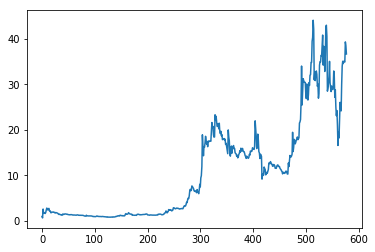

/Users/jatintaneja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/Users/jatintaneja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(100, activation="tanh", input_shape=(None, 1))`
/Users/jatintaneja/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/25
 - 2s - loss: 0.0200
Epoch 2/25
 - 2s - loss: 0.0015
Epoch 3/25
 - 1s - loss: 0.0015
Epoch 4/25
 - 2s - loss: 0.0016
Epoch 5/25
 - 1s - loss: 0.0015
Epoch 6/25
 - 2s - loss: 0.0014
Epoch 7/25
 - 2s - loss: 0.0015
Epoch 8/25
 - 2s - loss: 0.0015
Epoch 9/25
 - 2s - loss: 0.0015
Epoch 10/25
 - 2s - loss: 0.0015
Epoch 11/25
 - 2s - loss: 0.0015
Epoch 12/25
 - 2s - loss: 0.0014
Epoch 13/25
 - 1s - loss: 0.0014
Epoch 14/25
 - 1s - loss: 0.0014
Epoch 15/25
 - 1s - loss: 0.0014
Epoch 16/25
 - 1s - loss: 0.0015
Epoch 17/25
 - 1s - loss: 0.0015
Epoch 18/25
 - 1s - loss: 0.0014
Epoch 19/25
 - 1s - loss: 0.0014
Epoch 20/25
 - 1s - loss: 0.0014
Epoch 21/25
 - 1s - loss: 0.0014
Epoch 22/25
 - 1s - loss: 0.0015
Epoch 23/25
 - 1s - loss: 0.0015
Epoch 24/25
 - 1s - loss: 0.0013
Epoch 25/25
 - 1s - loss: 0.0014
Iteration 0: Done
Epoch 1/25
 - 1s - loss: 0.0014
Epoch 2/25
 - 1s - loss: 0.0014
Epoch 3/25
 - 1s - loss: 0.0014
Epoch 4/25
 - 1s - loss: 0.0014
Epoch 5/25
 - 1s - loss: 0.0013
Epoch 

 - 1s - loss: 0.0013
Epoch 14/25
 - 1s - loss: 0.0013
Epoch 15/25
 - 1s - loss: 0.0013
Epoch 16/25
 - 1s - loss: 0.0012
Epoch 17/25
 - 1s - loss: 0.0013
Epoch 18/25
 - 1s - loss: 0.0013
Epoch 19/25
 - 1s - loss: 0.0013
Epoch 20/25
 - 1s - loss: 0.0013
Epoch 21/25
 - 2s - loss: 0.0012
Epoch 22/25
 - 2s - loss: 0.0013
Epoch 23/25
 - 2s - loss: 0.0013
Epoch 24/25
 - 2s - loss: 0.0013
Epoch 25/25
 - 2s - loss: 0.0013
Prediction 8: [[0.7600986957550049]]


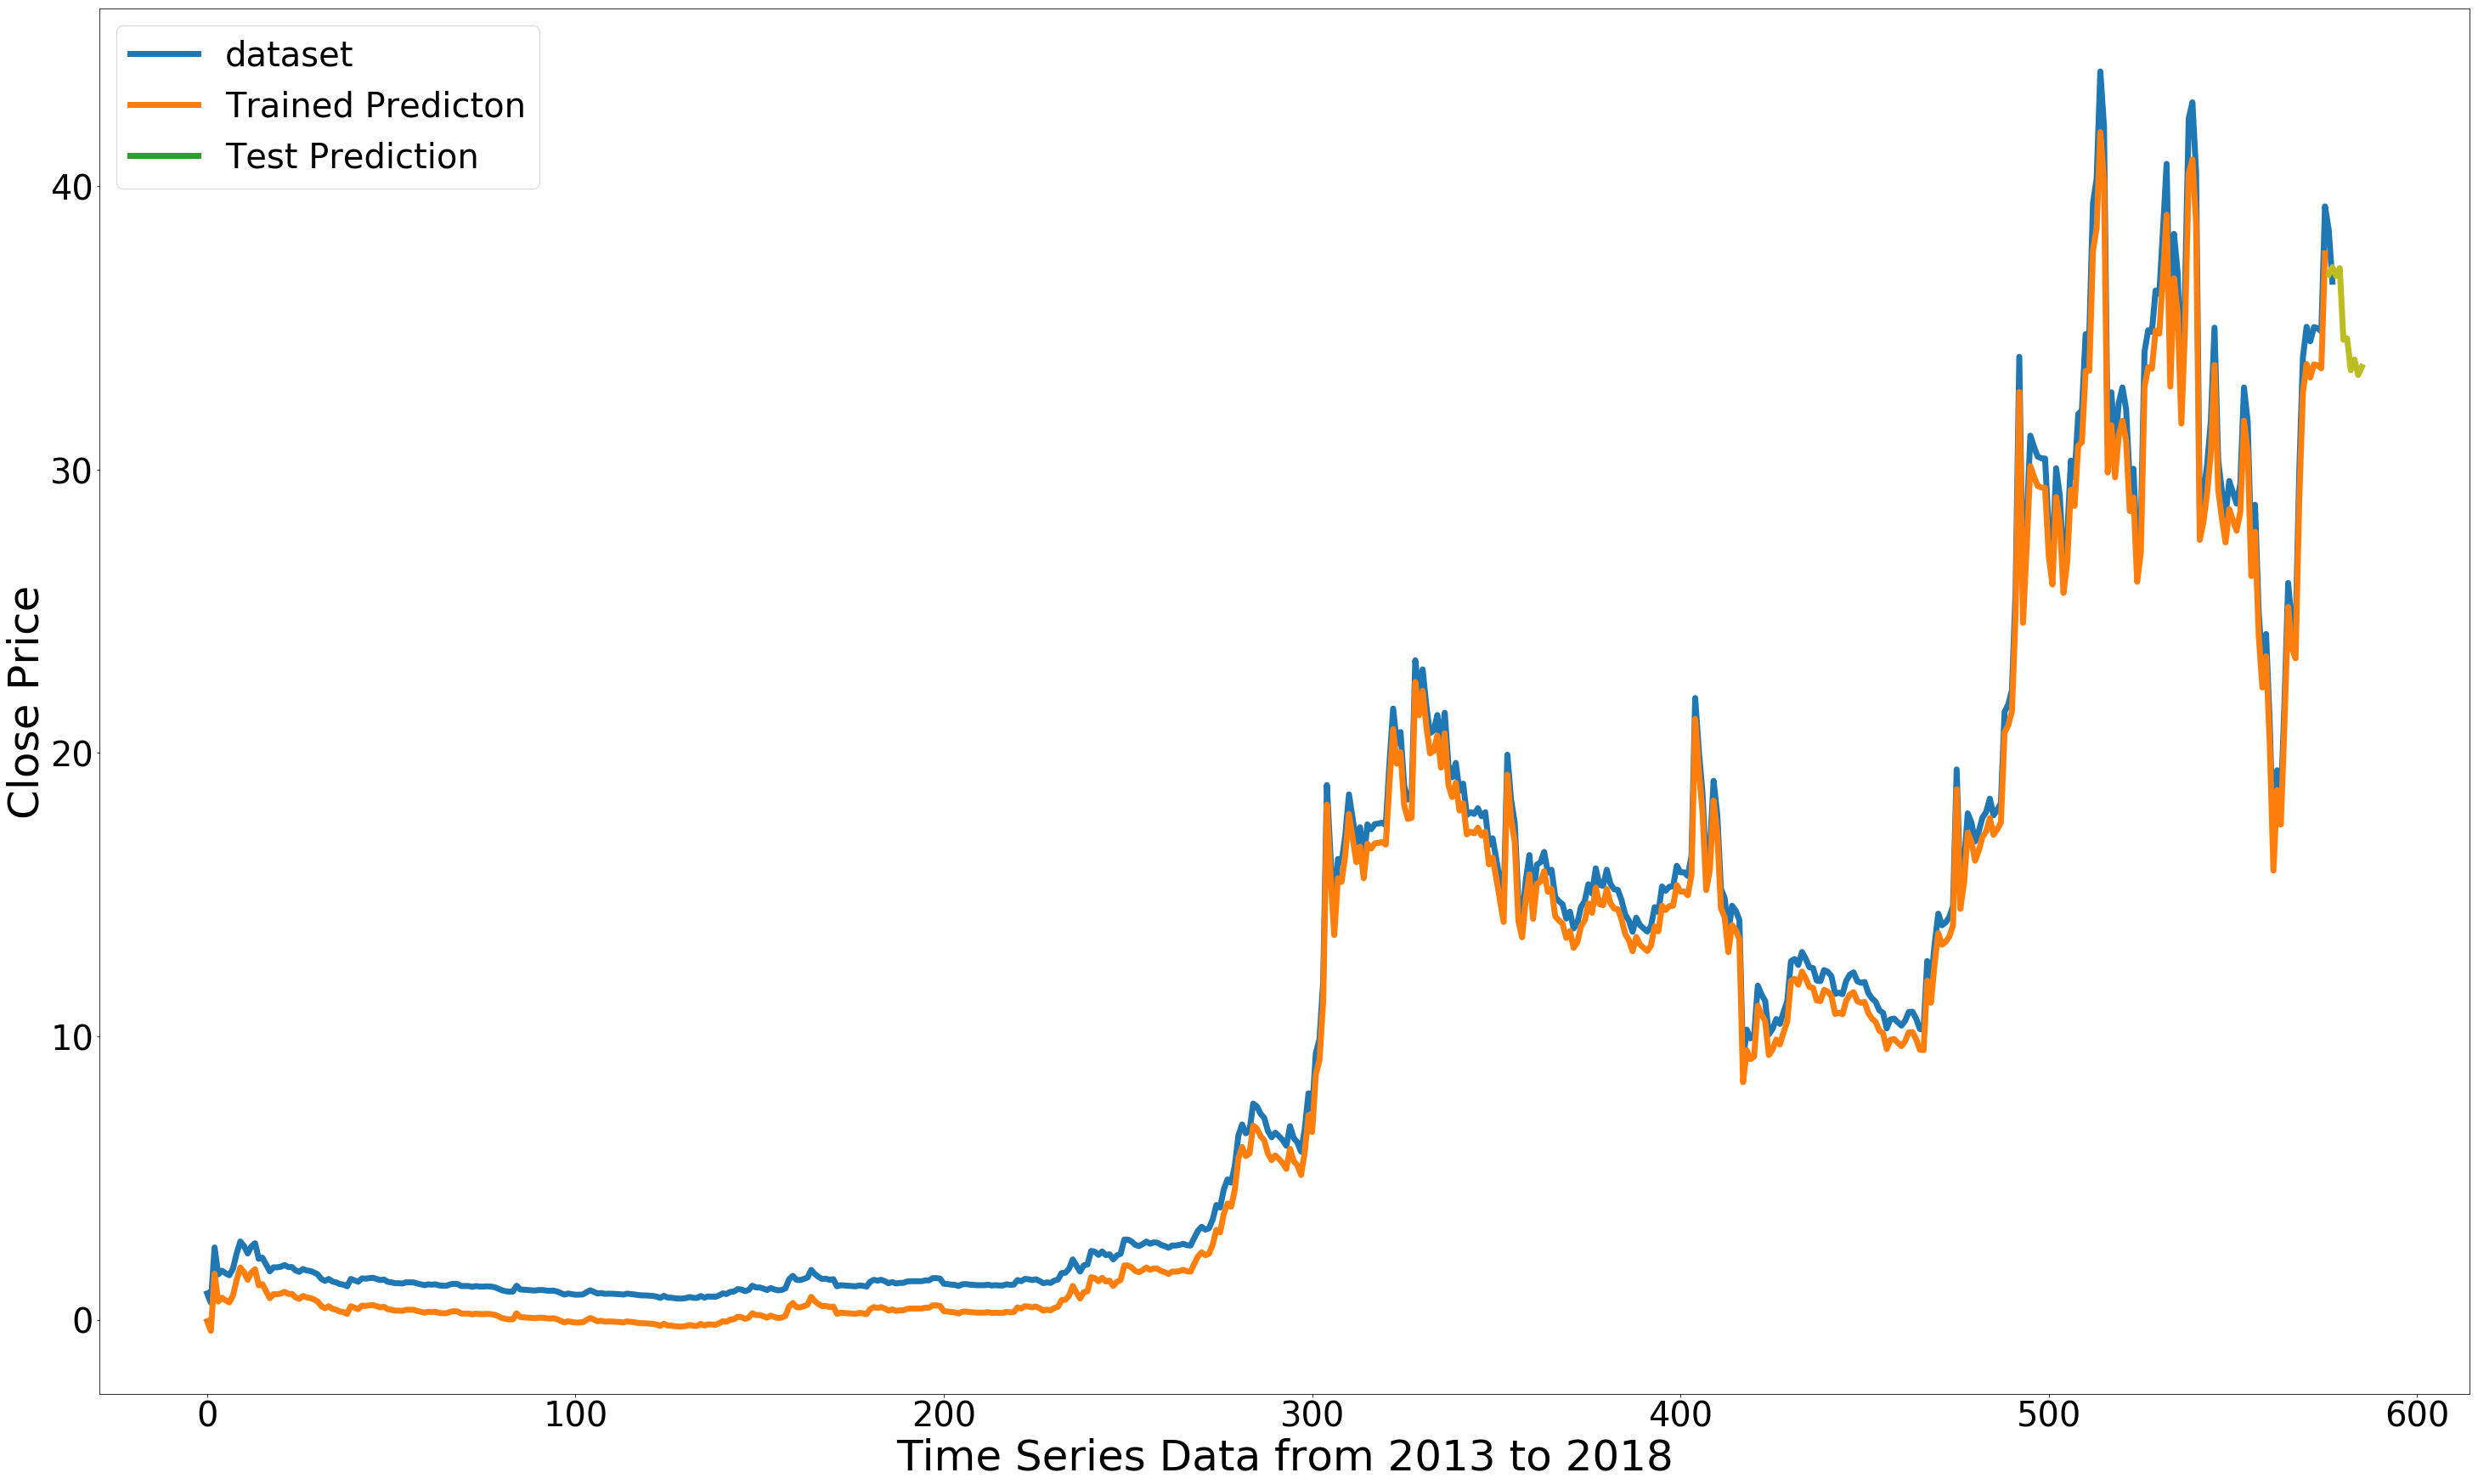

ETC
         market
0             0
1      76700600
2      49768300
3     202315000
4     128530000
5     140887000
6     136213000
7     129265000
8     147548000
9     194318000
10    228712000
11    213375000
12    193412000
13    213044000
14    222683000
15    178435000
16    179978000
17    160983000
18    142268000
19    152797000
20    153918000
21    154946000
22    159898000
23    154786000
24    154458000
25    144697000
26    139926000
27    147957000
28    145110000
29    143596000
..          ...
548  2907490000
549  2828350000
550  2969790000
551  2892380000
552  2858610000
553  2945280000
554  3303240000
555  3160490000
556  2707440000
557  2863780000
558  2484190000
559  2305470000
560  2409210000
561  2068330000
562  1669530000
563  1912010000
564  1809300000
565  2182530000
566  2588640000
567  2447400000
568  2425800000
569  2982730000
570  3426860000
571  3477970000
572  3439180000
573  3493650000
574  3498390000
575  3467860000
576  3940010000
577  3807360000

[57

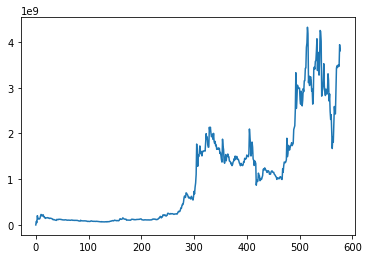

Epoch 1/25
 - 2s - loss: 0.0204
Epoch 2/25
 - 1s - loss: 0.0014
Epoch 3/25
 - 2s - loss: 0.0015
Epoch 4/25
 - 2s - loss: 0.0014
Epoch 5/25
 - 2s - loss: 0.0015
Epoch 6/25
 - 2s - loss: 0.0015
Epoch 7/25
 - 2s - loss: 0.0015
Epoch 8/25
 - 1s - loss: 0.0014
Epoch 9/25
 - 1s - loss: 0.0015
Epoch 10/25
 - 1s - loss: 0.0014
Epoch 11/25
 - 1s - loss: 0.0014
Epoch 12/25
 - 1s - loss: 0.0014
Epoch 13/25
 - 1s - loss: 0.0013
Epoch 14/25
 - 1s - loss: 0.0014
Epoch 15/25
 - 1s - loss: 0.0013
Epoch 16/25
 - 1s - loss: 0.0014
Epoch 17/25
 - 1s - loss: 0.0014
Epoch 18/25
 - 1s - loss: 0.0014
Epoch 19/25
 - 1s - loss: 0.0014
Epoch 20/25
 - 1s - loss: 0.0014
Epoch 21/25
 - 1s - loss: 0.0014
Epoch 22/25
 - 1s - loss: 0.0013
Epoch 23/25
 - 1s - loss: 0.0014
Epoch 24/25
 - 1s - loss: 0.0014
Epoch 25/25
 - 1s - loss: 0.0014
Iteration 0: Done
Epoch 1/25
 - 1s - loss: 0.0014
Epoch 2/25
 - 1s - loss: 0.0014
Epoch 3/25
 - 1s - loss: 0.0014
Epoch 4/25
 - 1s - loss: 0.0014
Epoch 5/25
 - 1s - loss: 0.0013
Epoch 

 - 1s - loss: 0.0013
Epoch 14/25
 - 1s - loss: 0.0013
Epoch 15/25
 - 1s - loss: 0.0013
Epoch 16/25
 - 1s - loss: 0.0012
Epoch 17/25
 - 1s - loss: 0.0012
Epoch 18/25
 - 1s - loss: 0.0012
Epoch 19/25
 - 1s - loss: 0.0013
Epoch 20/25
 - 1s - loss: 0.0012
Epoch 21/25
 - 1s - loss: 0.0012
Epoch 22/25
 - 1s - loss: 0.0012
Epoch 23/25
 - 2s - loss: 0.0013
Epoch 24/25
 - 1s - loss: 0.0012
Epoch 25/25
 - 2s - loss: 0.0012
Prediction 8: [[0.7660428881645203]]


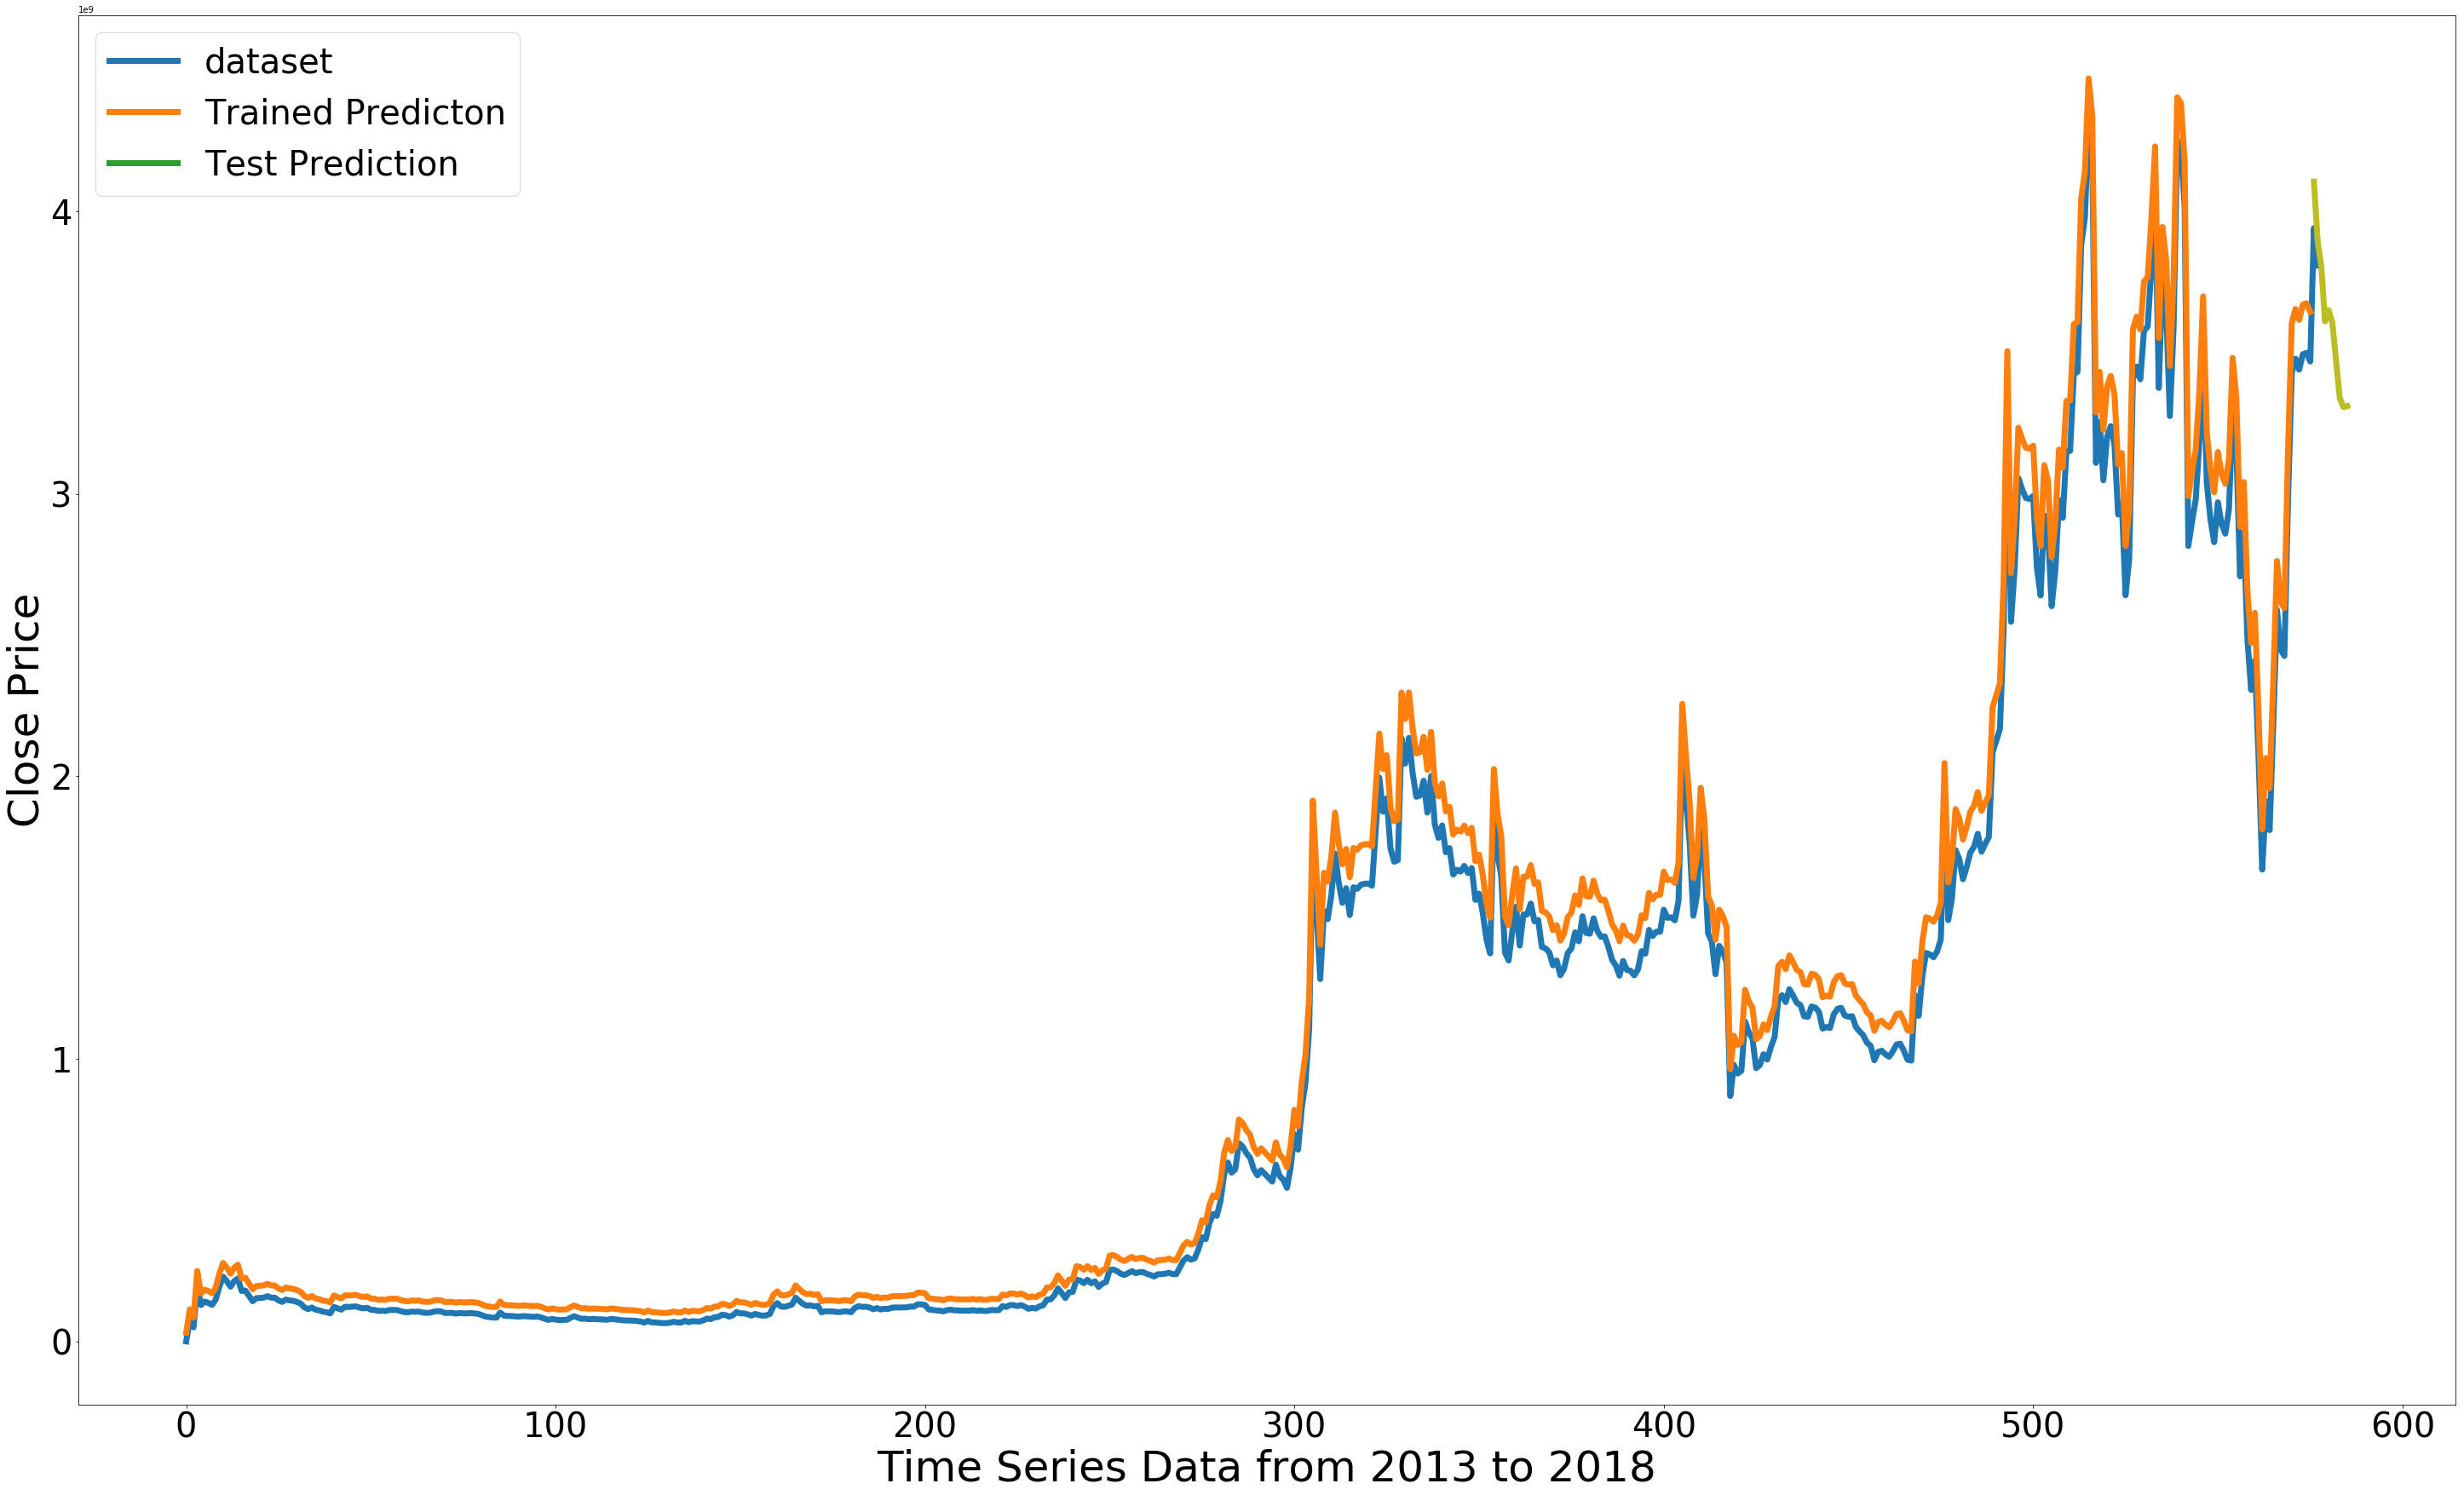

In [38]:
for coin_name in data_name_unique:
    predict(10, coin_name, 'close')
    predict(10, coin_name, 'market')